In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Videogames.csv")
data

,Rank,Name,Platform,Release_date,Meta_score,User_review
0,1,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1
1,2,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4
2,3,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7
3,4,SoulCalibur,Dreamcast,"September 8, 1999",98,8.4
4,5,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9
...,...,...,...,...,...,...
18795,18796,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",22,1.3
18796,18797,Drake of the 99 Dragons,Xbox,"November 3, 2003",22,1.7
18797,18798,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015",21,2.9
18798,18799,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012",20,1.7


In [2]:
data.head()

,Rank,Name,Platform,Release_date,Meta_score,User_review
0,1,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1
1,2,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4
2,3,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7
3,4,SoulCalibur,Dreamcast,"September 8, 1999",98,8.4
4,5,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9


In [3]:
print("Dimenstions of file: " + str(data.shape))

Dimenstions of file: (18800, 6)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          18800 non-null  int64 
 1   Name          18800 non-null  object
 2   Platform      18800 non-null  object
 3   Release_date  18800 non-null  object
 4   Meta_score    18800 non-null  int64 
 5   User_review   18800 non-null  object
dtypes: int64(2), object(4)
memory usage: 881.4+ KB


In [5]:
print(data.isnull().sum())

Rank            0
Name            0
Platform        0
Release_date    0
Meta_score      0
User_review     0
dtype: int64


In [6]:
data.describe()

,Rank,Meta_score
count,18800.000000,18800.000000
mean,9400.500000,70.648883
std,5427.236866,12.225006
min,1.000000,20.000000
25%,4700.750000,64.000000
50%,9400.500000,72.000000
75%,14100.250000,80.000000
max,18800.000000,99.000000


In [7]:
data.groupby('Platform').agg({"Meta_score": "mean"}).sort_values(by = "Meta_score")

,Meta_score
Platform,
Wii,65.806107
DS,66.679167
PSP,68.542969
Game Boy Advance,68.621005
Xbox 360,68.867397
PlayStation 2,68.946959
3DS,69.626263
Stadia,69.800000
Xbox,70.053232


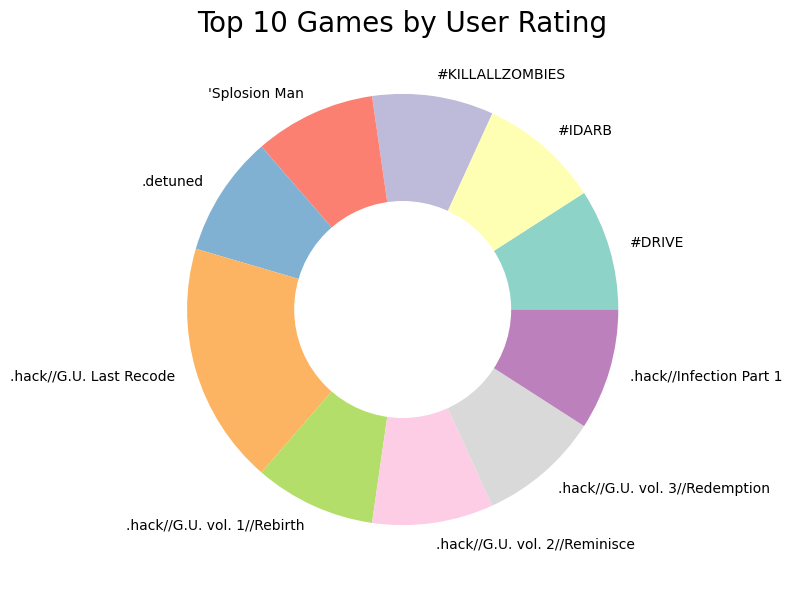

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
game = data.groupby("Name")["User_review"].count().head(10)
colours = sns.color_palette("Set3", n_colors=len(game))
plt.figure(figsize=(7, 7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Games by User Rating", fontsize=20)
plt.show()

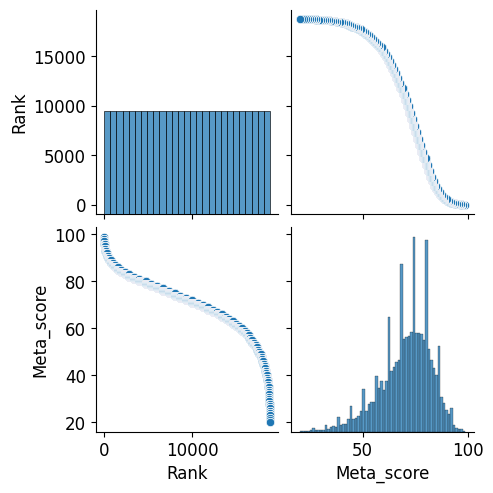

In [9]:
col = ['Rank','Meta_score']
sns.pairplot(data.loc[:,col].dropna())

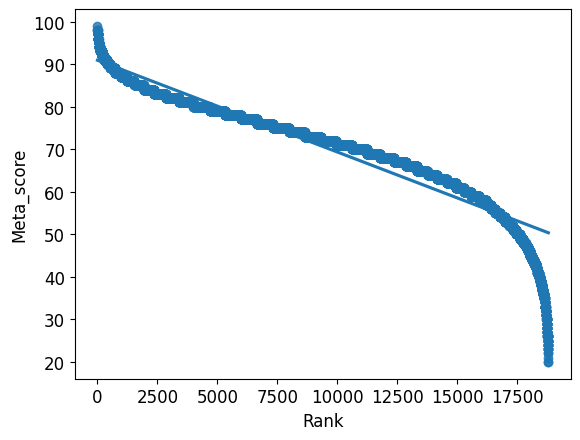

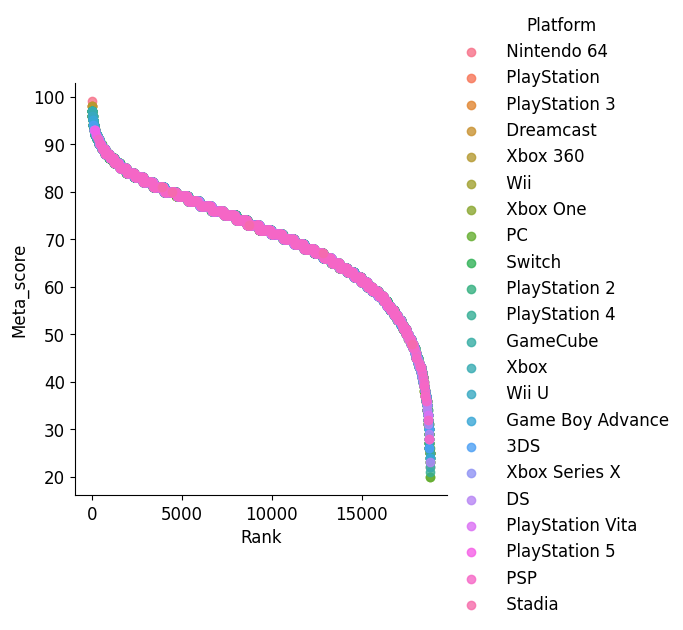

In [10]:
ax = sns.regplot(x="Rank", y="Meta_score", data=data)
sns.lmplot(x="Rank", y="Meta_score", data=data, hue = 'Platform',fit_reg =False)

In [11]:
x = data["Rank"]
y = data["Meta_score"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain = xtrain.values.reshape(-1, 1)
xtest = xtest.values.reshape(-1, 1)
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
import math
mse = mean_squared_error(ytest, predictions)
rmse=math.sqrt(mse)
r2 = r2_score(ytest, predictions)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 12.015800199648519
Root Mean Squared Error: 3.4663814273170397
R-squared: 0.9156326016816639
